In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1
Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS

Считать данные с помощью pandas

Вывести на экран первые 5 строк


In [2]:
df = pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### 1.1 Изучите количество памяти с помощью matplotlib

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

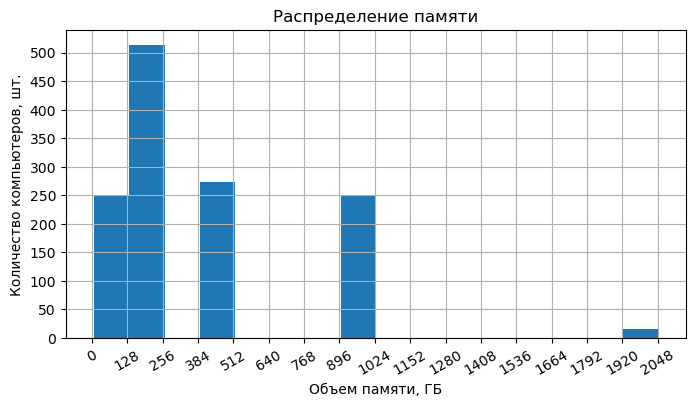

In [3]:
plt.figure(figsize=(8,4))

plt.hist(df['Memory_Amount'], bins=16)
plt.title('Распределение памяти')
plt.xlabel('Объем памяти, ГБ')
plt.ylabel('Количество компьютеров, шт.')
plt.xticks(range(0, 2050, 128), rotation=30)
plt.yticks(range(0, 550, 50))
plt.grid();

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib


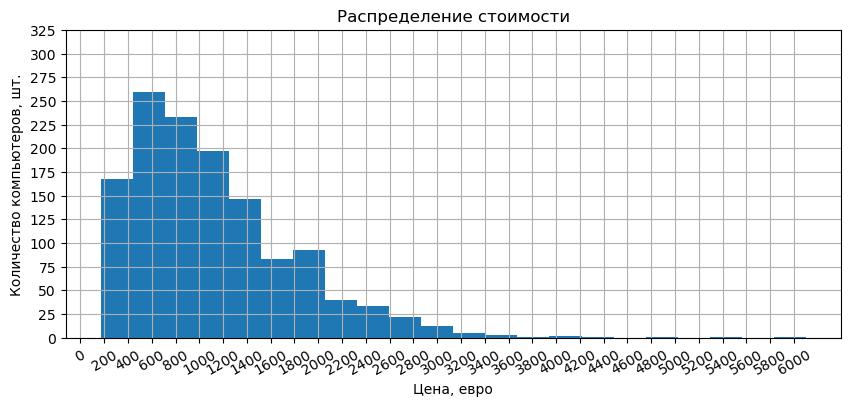

In [4]:
plt.figure(figsize=(10,4))

plt.hist(df['Price_euros'], bins=22)
plt.title('Распределение стоимости')
plt.xlabel('Цена, евро')
plt.ylabel('Количество компьютеров, шт.')
plt.xticks(range(0, 6200, 200), rotation=30)
plt.yticks(range(0, 350, 25))
plt.grid();

### 1.3 Изучите вес ноутбуков с помощью matplotlib


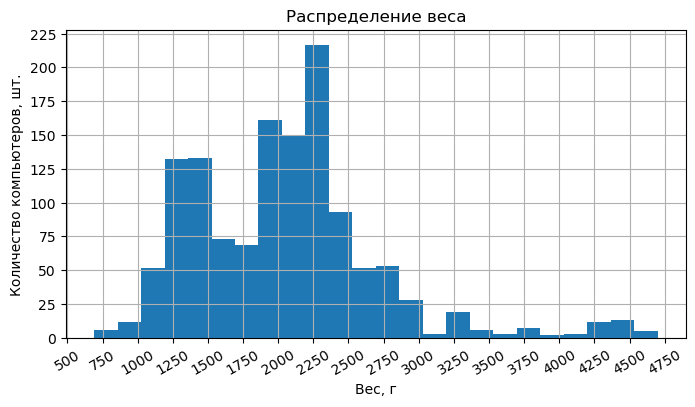

In [5]:
plt.figure(figsize=(8,4))

plt.hist(df['Weight'], bins=24)
plt.title('Распределение веса')
plt.xlabel('Вес, г')
plt.ylabel('Количество компьютеров, шт.')
plt.xticks(np.arange(0.5, 5, 0.25), np.arange(500, 5000, 250), rotation=30)
plt.yticks(range(0, 250, 25))
plt.grid();

## Задание 2
### 2.1 Изучите распределение типов носителя

Постройте график
Сделайте выводы


In [6]:
data = df['Memory_Type'].value_counts()
data

Memory_Type
SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: count, dtype: int64

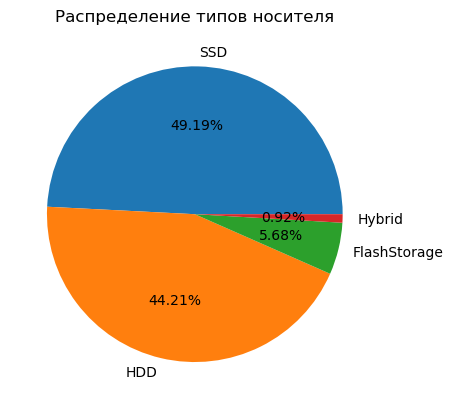

In [7]:
plt.pie(data, labels=data.index, autopct='%.2f%%')
plt.title('Распределение типов носителя')
plt.legend=data.index;

### 2.2 Изучите распределение компаний производителей



In [8]:
data = df['Company'].value_counts()
data

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

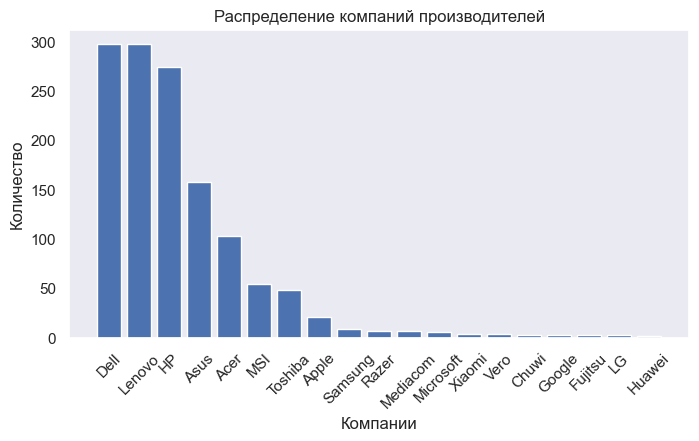

In [9]:
sns.set(rc={'figure.figsize': (8,4)})

# sns.barplot(x=df['Company'], y=data)
plt.bar(data.index, data)
plt.title('Распределение компаний производителей')
plt.xlabel('Компании')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid();

### 2.3 Изучите распределение операционной системы


In [10]:
data = df['OpSys'].value_counts()
data 

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

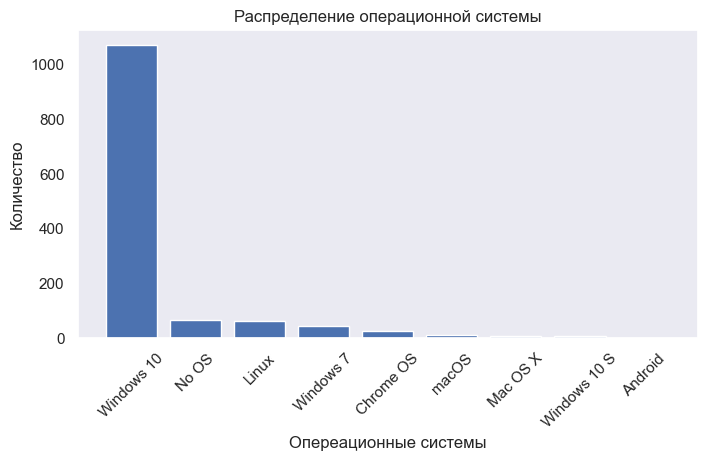

In [11]:
# sns.barplot(x=df['Company'], y=data)
plt.bar(data.index, data)
plt.title('Распределение операционной системы')
plt.xlabel('Опереационные системы')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid();

### 2.4 Изучите распределение компаний производителей CPU

In [12]:
data = df['Cpu_Company'].value_counts()
data 

Cpu_Company
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

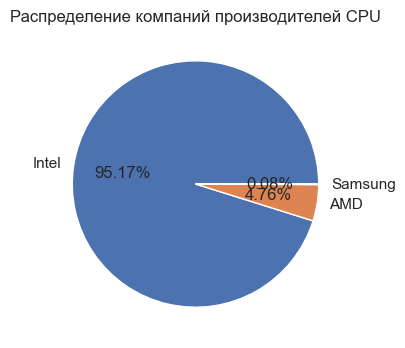

In [13]:
plt.pie(data, labels=data.index, autopct='%.2f%%')
plt.title('Распределение компаний производителей CPU');

## Задание 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

### 3.1 Постройте график в абсолютных величинах



In [14]:
data = pd.crosstab(index=df.Company, columns=df.Cpu_Company)
data = data.drop(columns='Samsung').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


In [15]:
n_ticks = np.arange(len(data['AMD']))
n_ticks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

TypeError: 'Index' object is not callable

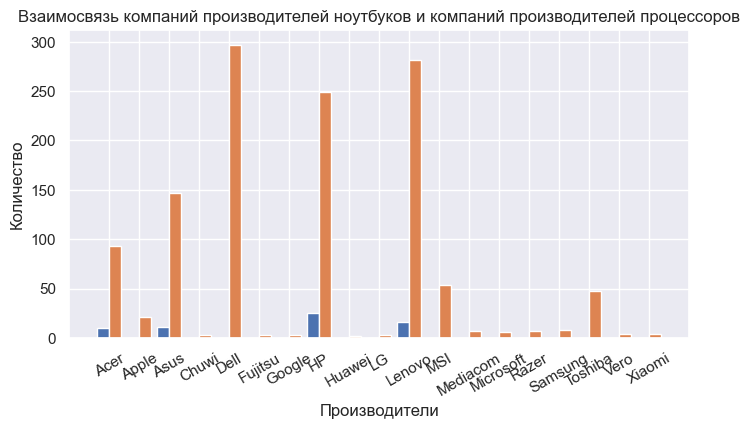

In [16]:
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Производители')
plt.ylabel('Количество')
plt.xticks(n_ticks, data.Company, rotation=30)
plt.legend(['AMD', 'Intel']);

### 3.2 Постройте график в относительных величинах

In [17]:
data = pd.crosstab(index=df.Company, columns=df.Cpu_Company, normalize='index')
data = data.drop(columns='Samsung').reset_index().round(2)
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.10,0.90
1,Apple,0.00,1.00
2,Asus,0.07,0.93
3,Chuwi,0.00,1.00
4,Dell,0.00,1.00
5,Fujitsu,0.00,1.00
6,Google,0.00,1.00
7,HP,0.09,0.91
8,Huawei,0.00,1.00
9,LG,0.00,1.00


TypeError: 'Index' object is not callable

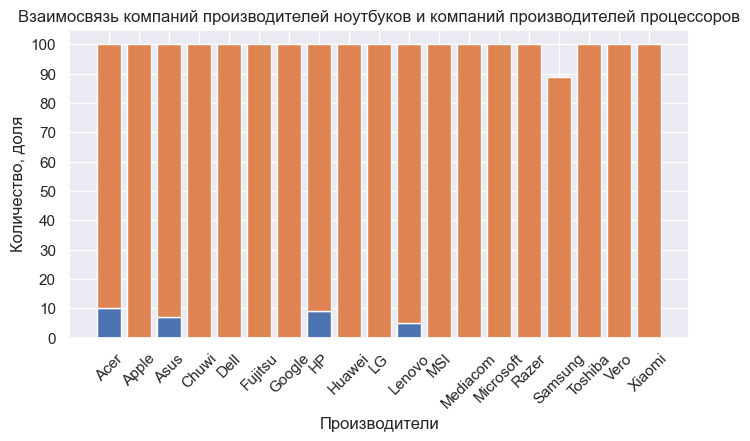

In [18]:
plt.bar(data.Company, data.AMD)
plt.bar(data.Company, data.Intel, bottom=data.AMD)

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Производители')
plt.ylabel('Количество, доля')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1), np.arange(0, 101, 10))
plt.legend(['AMD', 'Intel']);

## Задание 4
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы


### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора


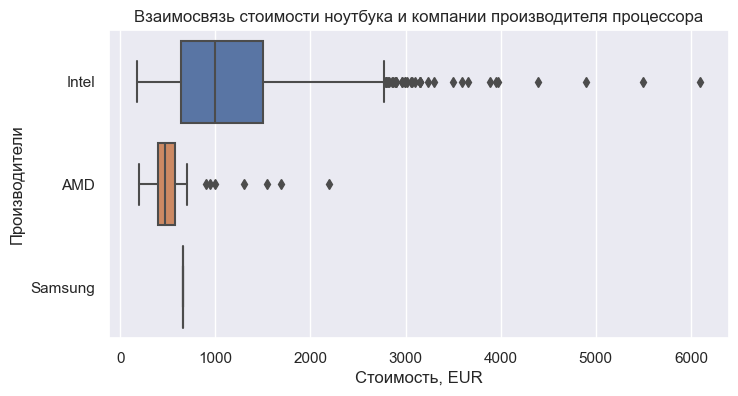

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(y = df['Cpu_Company'], x = df['Price_euros'])
plt.title('Взаимосвязь стоимости ноутбука и компании производителя процессора')
plt.xlabel('Стоимость, EUR')
plt.ylabel('Производители');

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти



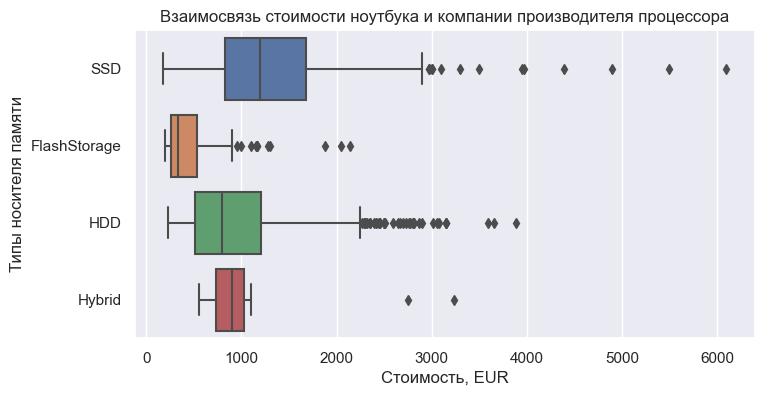

In [20]:
plt.figure(figsize=(8, 4))

sns.boxplot(y = df['Memory_Type'], x = df['Price_euros'])
plt.title('Взаимосвязь стоимости ноутбука и компании производителя процессора')
plt.xlabel('Стоимость, EUR')
plt.ylabel('Типы носителя памяти');

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти


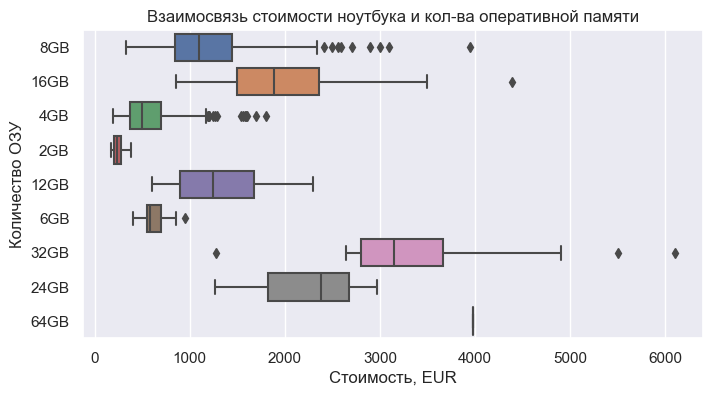

In [21]:
plt.figure(figsize=(8, 4))

sns.boxplot(y = df['Ram'], x = df['Price_euros'])
plt.title('Взаимосвязь стоимости ноутбука и кол-ва оперативной памяти')
plt.xlabel('Стоимость, EUR')
plt.ylabel('Количество ОЗУ');

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

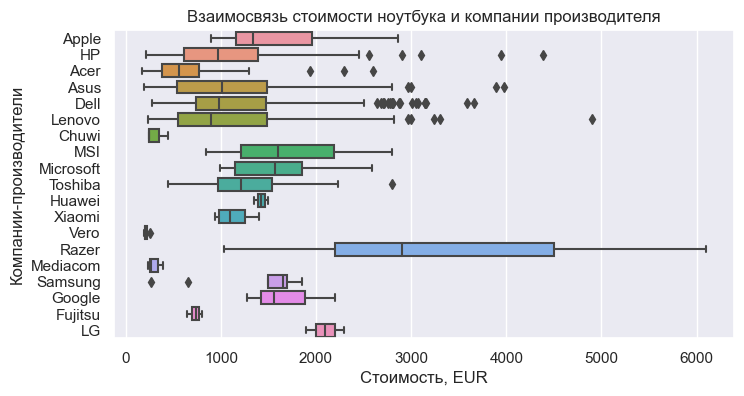

In [22]:
plt.figure(figsize=(8, 4))

sns.boxplot(y = df['Company'], x = df['Price_euros'])
plt.title('Взаимосвязь стоимости ноутбука и компании производителя')
plt.xlabel('Стоимость, EUR')
plt.ylabel('Компании-производители');

## Задание 5*.
Постройте матрицу корреляций для таблицы


In [27]:
df_corr = df[['Inches', 'Weight', 'Price_euros', 'Memory_Amount']].corr().round(2)
df_corr

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.00,0.83,0.07,0.27
Weight,0.83,1.00,0.21,0.18
Price_euros,0.07,0.21,1.00,-0.13
Memory_Amount,0.27,0.18,-0.13,1.00


<Axes: >

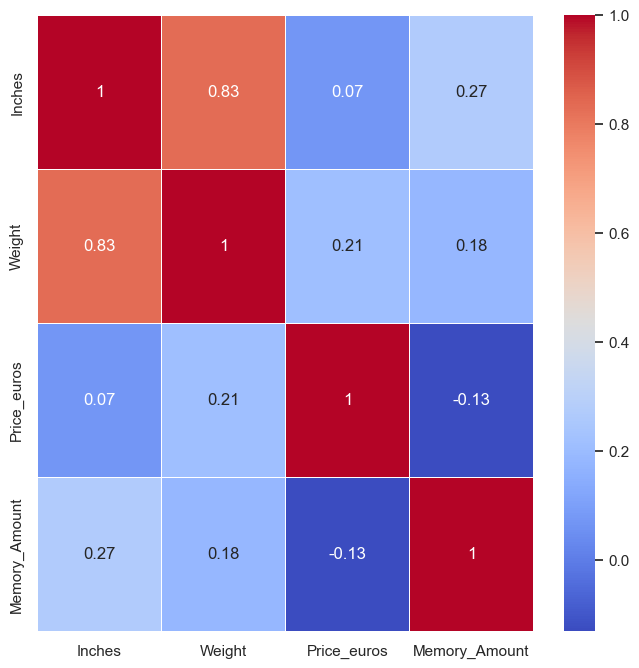

In [30]:
plt.figure(figsize = (8, 8))
sns.heatmap(df_corr, annot=True, linewidths=0.5, cmap='coolwarm')